In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sctk as sk
import seaborn

In [2]:
# Patient metadata
metadata = pd.read_csv('../data/sample_metadata.csv')
metadata

,GEX_SID,ATAC_SID,GEX,ATAC,Sample,Donor,DOB,Gender,date,age_years,state,disease,site_taken_fine,site_taken_broad,sorted,Nancy_histologic_score,slide_look_other,whole_tissue_signature,scSeq,bulkSeq
0,R01,A01,GX46,NX02,110543,d1,24/10/1951,M,21/06/2018,66,inflamed,CD,ileo-colon,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,4.0,"ulcers, granulation tissue (swapped)",M4M5,RNA+ATAC,ATAC + CD45+RNA
1,R02,A02,GX34,NX10,110544,d1,24/10/1951,M,21/06/2018,66,non-inflamed,CD,ileo-colon,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,0.0,normal,M6,RNA+ATAC,ATAC + CD45+RNA
2,R03,A03,GX58,NX18,110559,d2,06/01/1987,F,05/07/2018,31,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31-THY1+PDPN+,4.0,"ulcers, granulation tissue",M6,RNA+ATAC,ATAC + CD45+RNA
3,R04,A04,GX70,NX26,110560,d2,06/01/1987,F,05/07/2018,31,non-inflamed,CD,ascending colon,large intestine,CD45-EPCAM-CD31-THY1+PDPN+,0.0,normal,M6,RNA+ATAC,ATAC + CD45+RNA
4,R05,A05,GX42,NX02,110501,d3,03/06/1976,F,17/05/2018,41,inflamed,CD,descending colon,large intestine,CD45-EPCAM-CD31+THY1+PDPN+,NaN,"502 has ulcers, massive",M4M5,RNA+ATAC,NaN
5,R06,A06,GX54,NX10,110373,d4,21/12/1958,M,22/02/2018,59,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,4.0,some ulcers,M4M5,RNA+ATAC,NaN
6,R07,A07,GX66,NX18,110375,d4,21/12/1958,M,22/02/2018,59,non-inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,2.0,some ulcers,M6,RNA+ATAC,NaN
7,R08,A08,GX78,NX26,110614,d5,16/09/1960,F,16/08/2018,57,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,1.0,massive NE and PDPN(slide not consistent with ...,M4M5,RNA+ATAC,NaN
8,R09,A09,GX90,NX34,110615,d5,16/09/1960,F,16/08/2018,57,non-inflamed,CD,colon,large intestine,CD45-EPCAM-CD31+THY1+PDPN+,0.0,normal,M4M5,RNA+ATAC,NaN
9,R10,A10,GX07,NX42,110457,d6,22/12/1994,M,05/04/2018,23,inflamed,CD,ileum,small intestine,CD45-EPCAM-CD31+THY1+PDPN+,4.0,no NE but loads PDPN,M4M5,RNA+ATAC,NaN


In [3]:
# Load gene activity matrix
adata = sc.read("../20201116_scATAC_batch1_2/scATAC_GeneScoreMatrix.cellxgene.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 77712 × 24919
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'annot1'
    var: 'seqnames', 'start', 'end', 'strand', 'name', 'idx'
    obsm: 'X_umap'

In [7]:
print(adata.X[1:10, 1:10])

  (1, 2)	0.365
  (2, 2)	0.417
  (3, 2)	0.37
  (5, 2)	0.402
  (6, 2)	0.402
  (8, 2)	0.524
  (1, 3)	0.149
  (3, 3)	0.151
  (4, 3)	0.306
  (5, 3)	0.329
  (6, 3)	0.164
  (7, 3)	0.156
  (1, 4)	0.414
  (3, 4)	0.114
  (4, 4)	0.539
  (5, 4)	0.612
  (6, 4)	0.519
  (7, 4)	0.195
  (0, 5)	0.093
  (1, 5)	0.2
  (2, 5)	0.077
  (3, 5)	0.273
  (4, 5)	0.617
  (5, 5)	0.074
  (6, 5)	0.552
  :	:
  (8, 5)	0.076
  (0, 6)	0.75
  (1, 6)	0.727
  (2, 6)	0.943
  (3, 6)	1.291
  (4, 6)	0.215
  (6, 6)	0.868
  (7, 6)	0.585
  (8, 6)	0.519
  (0, 7)	1.22
  (1, 7)	1.502
  (2, 7)	0.82
  (3, 7)	0.893
  (4, 7)	0.183
  (5, 7)	0.395
  (6, 7)	0.394
  (7, 7)	1.494
  (8, 7)	0.8
  (0, 8)	0.955
  (1, 8)	0.673
  (3, 8)	0.401
  (4, 8)	0.405
  (6, 8)	0.435
  (7, 8)	1.01
  (8, 8)	0.661


In [8]:
adata.obs.annot1.value_counts()

annot1
S1                         18132
S3                         15791
VE postcapillary venlue     7757
S2                          7452
S5                          4881
LE                          4602
MF1                         4135
VE arterial tip             3945
S3x                         3819
VE arterial                 3253
PC                          1678
GL                          1350
S4                           801
IM                           116
Name: count, dtype: int64

In [9]:
adata.var

,seqnames,start,end,strand,name,idx
index,,,,,,
0,chr1,69091,70008,1,OR4F5,1
1,chr1,140339,139790,2,LOC729737,2
2,chr1,629010,585990,2,LOC101928626,3
3,chr1,817371,819837,1,FAM87B,4
4,chr1,825138,859446,1,LINC01128,5
...,...,...,...,...,...,...
24914,chrX,155264589,155258241,2,RAB39B,952
24915,chrX,155334657,155276211,2,CLIC2,953
24916,chrX,155380787,155381134,1,H2AFB1,954


In [10]:
adata.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PromoterRatio,ReadsInBlacklist,...,predictedGroup_Un_hm,predictedScore_Un_hm,predictedCell_Co_hm,predictedGroup_Co_hm,predictedScore_Co_hm,predictedCell,predictedGroup,predictedScore,Annot,annot1
index,,,,,,,,,,,,,,,,,,,,,
A11#GGACACCCAAGCCTTA-1,0.003560,0.826667,-0.000000,21941.0,64041.0,37125.0,4975.0,0.725010,0.168704,456.0,...,S5,0.919000,GTCTAGAAGAACAAGG-R10,S5,0.810135,CCACCATTCAAGTGTC-R08,S5,0.990794,S5,S5
A11#AACTGGTAGCGCCTAC-1,0.003975,0.906667,-0.000000,28270.0,60753.0,26802.0,5681.0,1.266734,0.133714,483.0,...,S1,0.739834,AGGCCACGTGCATCTA-R05,S5,0.350905,ACAGGGAGTAAGCGGT-R07,S5,0.298547,S1,S5
A11#AACGAGGGTTTGCCAA-1,0.003965,0.866667,-0.000000,20405.0,58888.0,35658.0,2825.0,0.651467,0.131393,467.0,...,S1,0.940081,GTCAGCGTCGCTGTTC-R02,S1,0.951609,CTGTGAAGTGAGCTCC-R10,S1,0.688192,S1,S1
A11#GCAACCGGTGGTACTT-1,0.003886,0.946667,-0.000000,18864.0,55969.0,34210.0,2895.0,0.636042,0.120808,435.0,...,S5,0.510784,GTGACGCAGTCATGGG-R13,S3,0.535707,GACTCTCTCTCCCTAG-R05,S1,0.438329,S1,S5
A11#TTACGTTAGCATACCT-1,0.004228,0.573333,-0.000000,21325.0,55469.0,30477.0,3667.0,0.820028,0.145820,469.0,...,S1,0.662778,TACCCGTTCTTCCCGA-R11,S1,0.963192,CCGTAGGCAACCTATG-R11,S1,0.727527,S1,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A08#CACTGAAGTTCCAATG-1,0.012099,0.800000,-0.000000,849.0,2149.0,1167.0,133.0,0.841474,0.115635,52.0,...,VE postcapillary venlue,0.943734,GGGACAACACTAGGCC-R11,VE postcapillary venlue,0.802882,CTCATGCCAACTCCCT-R13,VE postcapillary venlue,0.861471,VE postcapillary venlue,VE postcapillary venlue
A08#TTAGGTGCATCGGCCA-1,0.006836,0.400000,-0.000000,789.0,2121.0,1217.0,115.0,0.742810,0.168788,29.0,...,S5,0.549832,CAGTGCGGTGGTTTGT-R13,S1,0.683189,AGACAGGCACCAGCGT-R02,S1,0.543253,S5,S5
A08#CCGTGAGTCGAACACT-1,0.003305,2.200000,5.255331,858.0,2118.0,1083.0,177.0,0.955679,0.165014,14.0,...,PC,1.000000,CTCCTTTGTAGCGTCC-R03,PC,1.000000,CTGCAGGGTAAGATTG-R11,PC,1.000000,PC,PC


In [11]:
adata.obs.annot1.value_counts()

annot1
S1                         18132
S3                         15791
VE postcapillary venlue     7757
S2                          7452
S5                          4881
LE                          4602
MF1                         4135
VE arterial tip             3945
S3x                         3819
VE arterial                 3253
PC                          1678
GL                          1350
S4                           801
IM                           116
Name: count, dtype: int64

# Replicate original UMAP plot

In [13]:
# Write UMAP embedding to default name, enabling plot call with sc.pl.umap()
#adata.obsm['X_umap'] = adata.obsm['X_umap_bk']

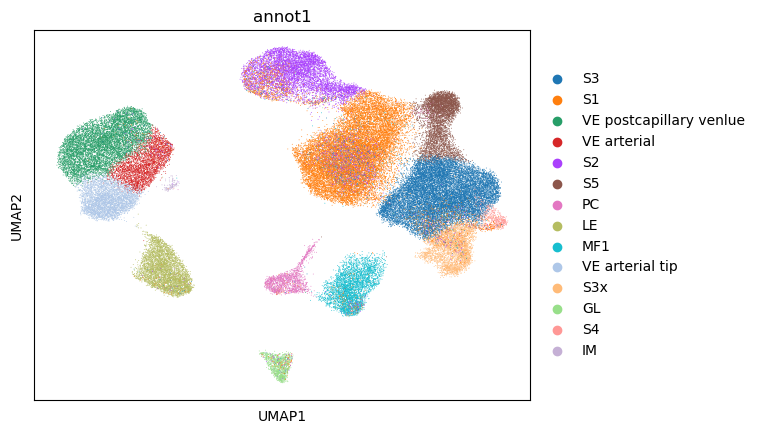

In [14]:
# Plot to ensure that data is identical
sc.pl.umap(adata, color='annot1')

# Filter on fibroblasts, MF, and PC cell populations

In [15]:
# Subset data
select_cells = ['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC']
adata = adata[adata.obs.annot1.isin(select_cells)]

In [16]:
adata.obs.annot1 = adata.obs.annot1.cat.add_categories('MF2')  # add missing category (such that coloring scheme aligns with scRNA-seq data)

# Reorder annotation labels
adata.obs.annot1 = adata.obs.annot1.cat.reorder_categories([
    'S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'MF2', 'PC'  # data does not contain MF2
])

In [17]:
adata

AnnData object with n_obs × n_vars = 56689 × 24919
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'annot1'
    var: 'seqnames', 'start', 'end', 'strand', 'name', 'idx'
    uns: 'annot1_colors'
    obsm: 'X_umap'

In [18]:
pd.set_option('display.max_columns', None)
adata.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PromoterRatio,ReadsInBlacklist,ReadsInPromoter,ReadsInTSS,Sample,TSSEnrichment,Clusters,predictedCell_Un,predictedGroup_Un,predictedScore_Un,predictedCell_Co,predictedGroup_Co,predictedScore_Co,Clusters_hm,predictedCell_Un_hm,predictedGroup_Un_hm,predictedScore_Un_hm,predictedCell_Co_hm,predictedGroup_Co_hm,predictedScore_Co_hm,predictedCell,predictedGroup,predictedScore,Annot,annot1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A11#GGACACCCAAGCCTTA-1,0.003560,0.826667,-0.000000,21941.0,64041.0,37125.0,4975.0,0.725010,0.168704,456.0,21608.0,20380.0,A11,12.259,C24,GTCCACTCATTAAGCC-R10,S5,0.930315,TCGAAGTCATCTTAGG-R10,S5,0.974166,C12,CACAGATTCCCTTGGT-R08,S5,0.919000,GTCTAGAAGAACAAGG-R10,S5,0.810135,CCACCATTCAAGTGTC-R08,S5,0.990794,S5,S5
A11#AACTGGTAGCGCCTAC-1,0.003975,0.906667,-0.000000,28270.0,60753.0,26802.0,5681.0,1.266734,0.133714,483.0,16247.0,14158.0,A11,8.718,C23,AGGAAATTCATTCGTT-R04,S1,0.798763,TAGACCACACAATCTG-R10,S1,0.799853,C26,ATCGATGCAAGTCATC-R02,S1,0.739834,AGGCCACGTGCATCTA-R05,S5,0.350905,ACAGGGAGTAAGCGGT-R07,S5,0.298547,S1,S5
A11#AACGAGGGTTTGCCAA-1,0.003965,0.866667,-0.000000,20405.0,58888.0,35658.0,2825.0,0.651467,0.131393,467.0,15475.0,12567.0,A11,7.671,C23,TTGCGTCTCAAATGCC-R11,S1,0.872486,TAGACCACACAATCTG-R10,S1,0.948575,C25,AACCATGTCAGACAAA-R09,S1,0.940081,GTCAGCGTCGCTGTTC-R02,S1,0.951609,CTGTGAAGTGAGCTCC-R10,S1,0.688192,S1,S1
A11#GCAACCGGTGGTACTT-1,0.003886,0.946667,-0.000000,18864.0,55969.0,34210.0,2895.0,0.636042,0.120808,435.0,13523.0,12465.0,A11,11.104,C23,AGACAAATCAAGTTGC-R11,S5,0.504017,TTCCTCTGTTATAGAG-R11,S1,0.749262,C13,TTGATGGAGTAACGAT-R05,S5,0.510784,GTGACGCAGTCATGGG-R13,S3,0.535707,GACTCTCTCTCCCTAG-R05,S1,0.438329,S1,S5
A11#TTACGTTAGCATACCT-1,0.004228,0.573333,-0.000000,21325.0,55469.0,30477.0,3667.0,0.820028,0.145820,469.0,16177.0,14727.0,A11,9.062,C23,TCAATTCAGGGACACT-R10,S1,0.886859,CATTGTTTCCTACACC-R10,S1,0.898044,C25,GTATTTCTCTGGGCAC-R10,S1,0.662778,TACCCGTTCTTCCCGA-R11,S1,0.963192,CCGTAGGCAACCTATG-R11,S1,0.727527,S1,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A08#AGGCGAAAGCAGAGCT-1,0.003059,0.400000,-0.000000,845.0,2288.0,1284.0,159.0,0.781931,0.134397,14.0,615.0,533.0,A08,10.661,C24,GACCCAGCACGCAAAG-R05,S5,1.000000,AGGCCACGTGCATCTA-R05,S5,0.990640,C13,CAGAGCCCATCTCATT-R05,S5,0.978475,CGAGGAAGTGGCTTAT-R05,S5,0.896223,CAAGAGGTCTCGGGAC-R08,S5,0.907108,S5,S5
A08#TAGCCCTGTTTGTCTT-1,0.006399,2.200000,5.255331,541.0,2188.0,1551.0,96.0,0.410703,0.167962,28.0,735.0,683.0,A08,16.101,C24,TTTCGATCATGATAGA-R05,S5,0.389353,AGCGCTGTCATGCCGG-R13,S3,0.472784,C12,ACAAAGATCCTCGCAT-R06,S3,0.587251,CTGTAGACAGTTACCA-R13,S3,0.482216,AGACAGGCACCAGCGT-R02,S3,0.499528,S5,S5
A08#AACGGGACATCATCGA-1,0.002297,0.800000,-0.000000,754.0,2177.0,1248.0,175.0,0.744391,0.220028,10.0,958.0,902.0,A08,14.404,C22,ATGCCTCTCGTTCCTG-R03,PC,1.000000,TAACTTCGTAATGATG-R07,PC,1.000000,C18,GTGTGATTCACCTTAT-R04,PC,0.996068,CTCCTTTGTAGCGTCC-R03,PC,1.000000,CTGCAGGGTAAGATTG-R11,PC,1.000000,PC,PC


In [19]:
adata.obs.annot1.value_counts()

annot1
S1     18132
S3     15791
S2      7452
S5      4881
MF1     4135
S3x     3819
PC      1678
S4       801
MF2        0
Name: count, dtype: int64

## Differential expression of 

In [25]:
adata.obs.annot1.value_counts()

annot1
S1     18132
S3     15791
S2      7452
S5      4881
MF1     4135
S3x     3819
PC      1678
S4       801
MF2        0
Name: count, dtype: int64

In [26]:
# log transform
#sc.pp.log1p(adata)

In [42]:
adata.var.index = adata.var.name

In [43]:
sc.tl.rank_genes_groups(adata, groupby='annot1', method='t-test', groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'])

In [44]:
sc.get.rank_genes_groups_df(adata, group=None)

# .to_csv(
#     'tables/fibroblast_markers_ttest_ATAC.csv',
#     index=False)

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,S1,ADGRL3,68.315842,1.668212,0.0,0.0
1,S1,ZNF536,61.283989,1.272739,0.0,0.0
2,S1,STOX2,56.756363,1.252452,0.0,0.0
3,S1,CXCL1,55.627529,2.368795,0.0,0.0
4,S1,MIR4418,52.894539,1.791150,0.0,0.0
...,...,...,...,...,...,...
199347,PC,BDKRB2,-66.063240,-2.998722,0.0,0.0
199348,PC,BMP7,-68.318695,-3.102075,0.0,0.0
199349,PC,PDPN,-77.778214,-3.609589,0.0,0.0
199350,PC,GAS7,-78.274910,-3.397056,0.0,0.0


In [45]:
tab = sc.get.rank_genes_groups_df(adata, group=None)

In [46]:
tab[tab.group == 'S5'].head(50)

,group,names,scores,logfoldchanges,pvals,pvals_adj
124595,S5,GLIS3,57.832569,2.044621,0.000000e+00,0.000000e+00
124596,S5,KCNJ15,54.141731,2.100529,0.000000e+00,0.000000e+00
124597,S5,LINC01423,53.502083,2.324216,0.000000e+00,0.000000e+00
124598,S5,CUX1,49.697823,1.561238,0.000000e+00,0.000000e+00
124599,S5,DSCR10,49.486450,1.972227,0.000000e+00,0.000000e+00
124600,S5,HECW2,47.854477,1.686574,0.000000e+00,0.000000e+00
124601,S5,ADAM12,47.295197,1.570986,0.000000e+00,0.000000e+00
124602,S5,LINC00862,47.286373,2.484513,0.000000e+00,0.000000e+00
124603,S5,CSGALNACT1,46.832096,1.587612,0.000000e+00,0.000000e+00
124604,S5,ROR2,46.381058,1.510208,0.000000e+00,0.000000e+00


In [37]:
#print(adata.X[1:10, 1:10])

In [47]:
adata.var

,seqnames,start,end,strand,name,idx
name,,,,,,
OR4F5,chr1,69091,70008,1,OR4F5,1
LOC729737,chr1,140339,139790,2,LOC729737,2
LOC101928626,chr1,629010,585990,2,LOC101928626,3
FAM87B,chr1,817371,819837,1,FAM87B,4
LINC01128,chr1,825138,859446,1,LINC01128,5
...,...,...,...,...,...,...
RAB39B,chrX,155264589,155258241,2,RAB39B,952
CLIC2,chrX,155334657,155276211,2,CLIC2,953
H2AFB1,chrX,155380787,155381134,1,H2AFB1,954


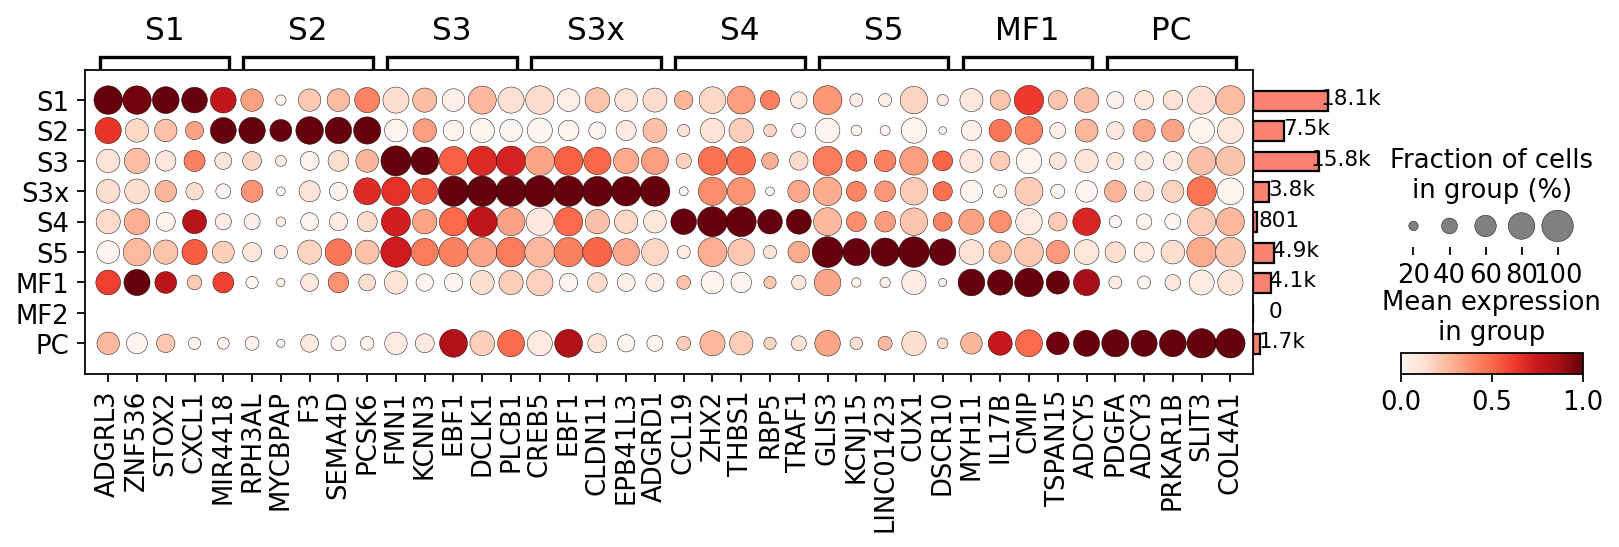

In [70]:
plot = sc.pl.rank_genes_groups_dotplot(
    adata,
    groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'],
    n_genes=5,
    dendrogram=False,
    standard_scale='var',
    figsize=(12, 2.5),
    return_fig=True
)

plot.add_totals()
plot.savefig("figures/dotplot_ATACgenes_top5.pdf")

In [62]:
# sc.pl.rank_genes_groups_heatmap(adata, show_gene_labels=True, groups=['S1', 'S2', 'S3', 'S3x', 'S4', 'S5', 'MF1', 'PC'], dendrogram=False)

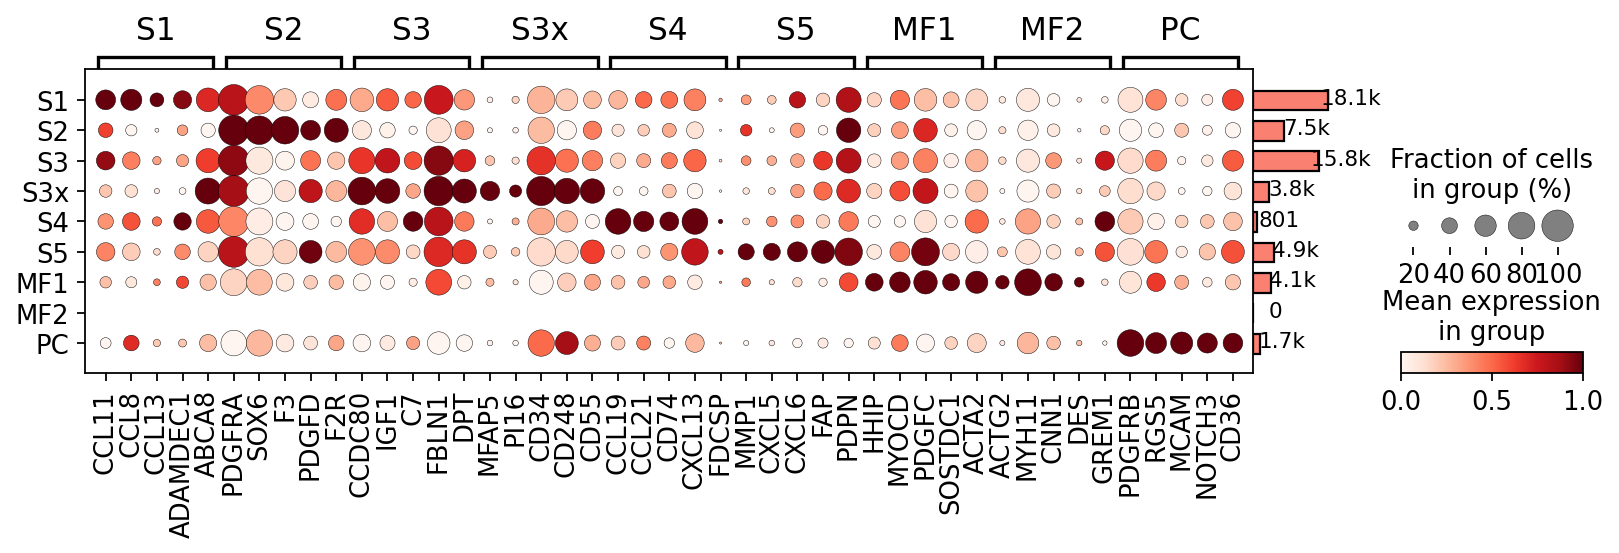

In [72]:
marker_dict = {
    'S1': ['CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', 'ABCA8'],
    'S2': ['PDGFRA', 'SOX6', 'F3', 'PDGFD', 'F2R'],
    'S3': ['CCDC80', 'IGF1',  'C7', 'FBLN1', 'DPT'],
    'S3x': ['MFAP5', 'PI16', 'CD34', 'CD248', 'CD55'],
    'S4': ['CCL19', 'CCL21', 'CD74', 'CXCL13', 'FDCSP'],
    'S5': ['MMP1', 'CXCL5', 'CXCL6', 'FAP', 'PDPN'],
    'MF1': ['HHIP', 'MYOCD', 'PDGFC',  'SOSTDC1', 'ACTA2'],
    'MF2': ['ACTG2', 'MYH11', 'CNN1', 'DES', 'GREM1'],
    'PC': ['PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36']
}

plot = sc.pl.dotplot(
    adata,
    var_names=marker_dict,
    groupby='annot1',
    dendrogram=False,
    standard_scale='var',
    figsize=(12, 2.5),
    return_fig=True
)

plot.add_totals()
plot.savefig("figures/dotplot_ATACgenes_markers.pdf")